In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

## Reading CSV

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
# checking percentage of null values in each column, 
# this will help to drop the columns which have higher percentage of null values in them
round(df.isnull().sum()/len(df)*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

## Dropping columns where missing data is more than equal to 65%

In [6]:
for col in df.columns:
    missing_values = round(df[col].isna().sum() / df.shape[0], 2)
    if missing_values >= 0.65:
        df.drop(col, axis = 1, inplace = True)
        
df.shape

(39717, 54)

#### Dropping extra columns containing text like desc, emp_title, id, member_id, title, url, zip_code, etc. (full list below) and columns that has only single value in them are totally irrelevant

In [7]:
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code',
 'initial_list_status',	
 'collections_12_mths_ex_med',	
 'policy_code',	
 'application_type',	
 'acc_now_delinq',
 'chargeoff_within_12_mths',	
 'delinq_amnt',	
 'pub_rec_bankruptcies',	
 'tax_liens'
]

df.drop(drop_cols, axis = 1, inplace = True)

In [8]:
df.shape

(39717, 20)

## Dropping records where loan_status = 'Current'

In [9]:
df = df[df['loan_status'].str.lower() != "current"]
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,total_pymnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,5863.155187
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,1008.710000
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,3005.666844
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,12231.890000
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,Nov-04,5632.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,home_improvement,CO,11.33,Nov-90,2822.969293
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,credit_card,NC,6.40,Dec-86,9913.491822
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,debt_consolidation,MA,2.30,Oct-98,5272.161128
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,other,MD,3.72,Nov-88,5174.198551


In [10]:
# checking null values in all the columns
df.isna().sum().sort_values(ascending=False)

emp_length             1033
loan_amnt                 0
funded_amnt_inv           0
funded_amnt               0
term                      0
int_rate                  0
grade                     0
installment               0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
total_pymnt               0
dtype: int64

## Cleaning columns

#### cleaning int_rate column by removing % from the end and removing month from 'term' column

In [11]:
# removing % from int_rate column
df.loc[:, 'int_rate'] = df['int_rate'].str.replace('%', '', regex=False)
df.loc[:, 'int_rate'] = df['int_rate'].astype('float')
df.loc[:, 'term'] = df['term'].str.replace(' months', '', regex=False)
df.loc[:, 'term'] = df['term'].astype('int')


In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,total_pymnt
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,5863.155187
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,1008.710000
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,3005.666844
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,12231.890000
5,5000,5000,5000.0,36,7.9,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,Nov-04,5632.210000


#### cleaning date columns: Changing type of date time column to date time format

In [13]:
col_list = ['issue_d', 'earliest_cr_line']
def date_modifier(cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format = '%b-%y')
date_modifier(col_list)

## Outlier Treatment

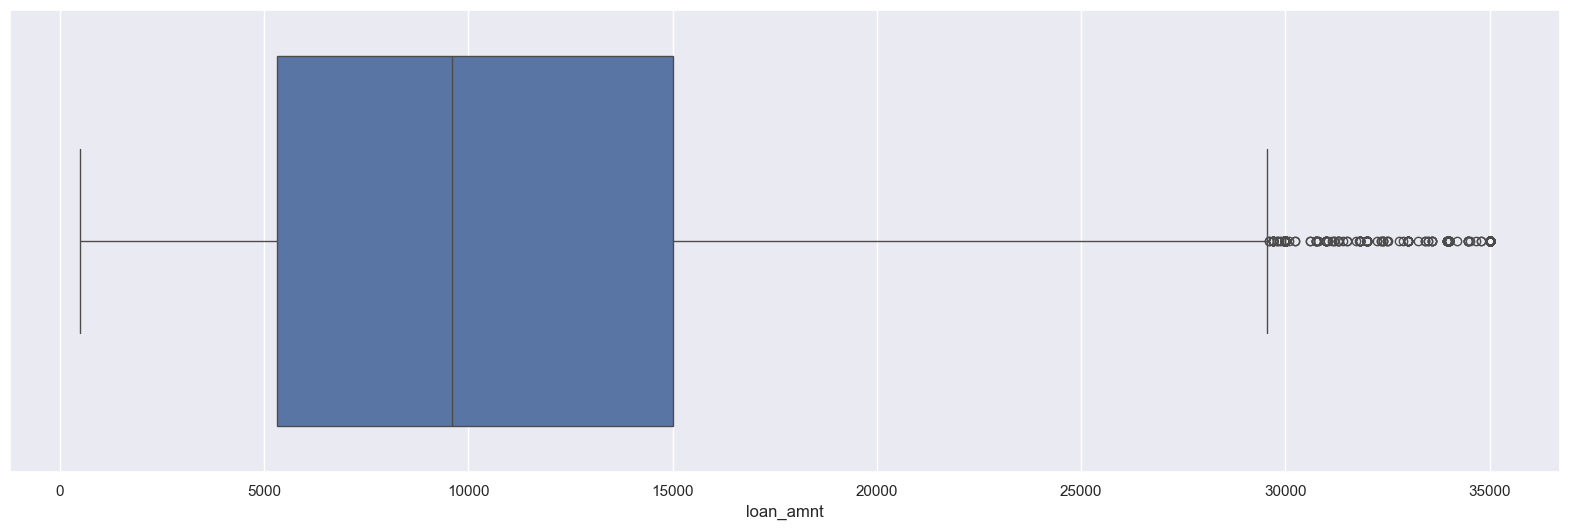

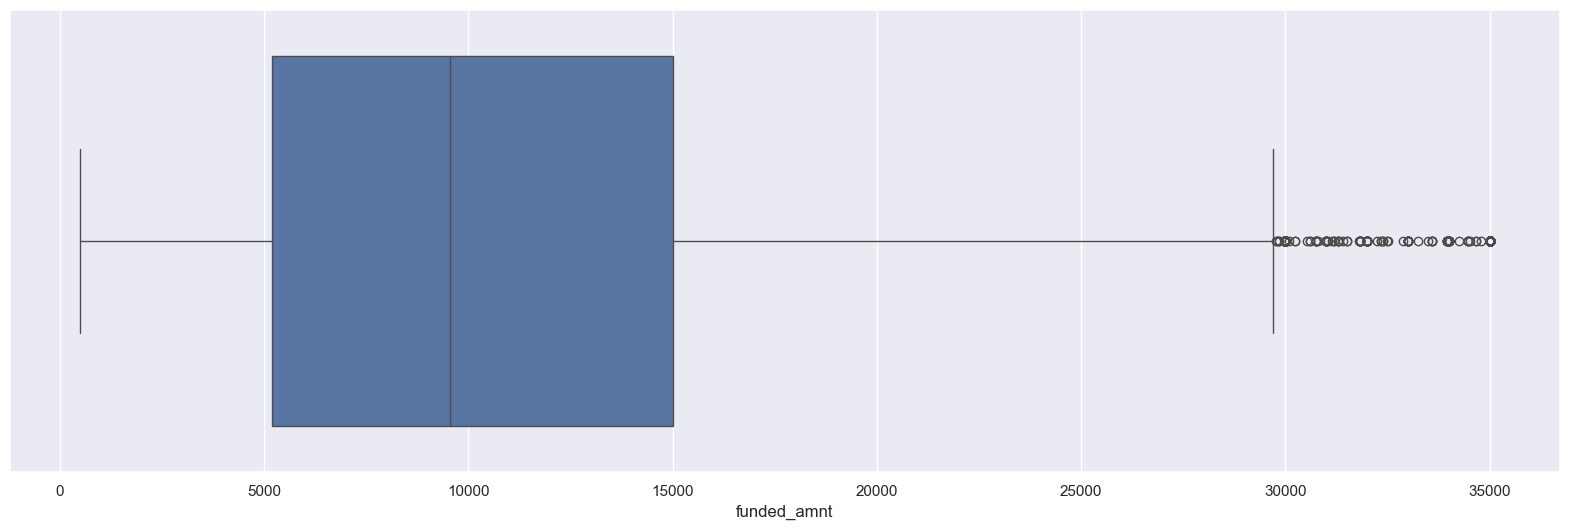

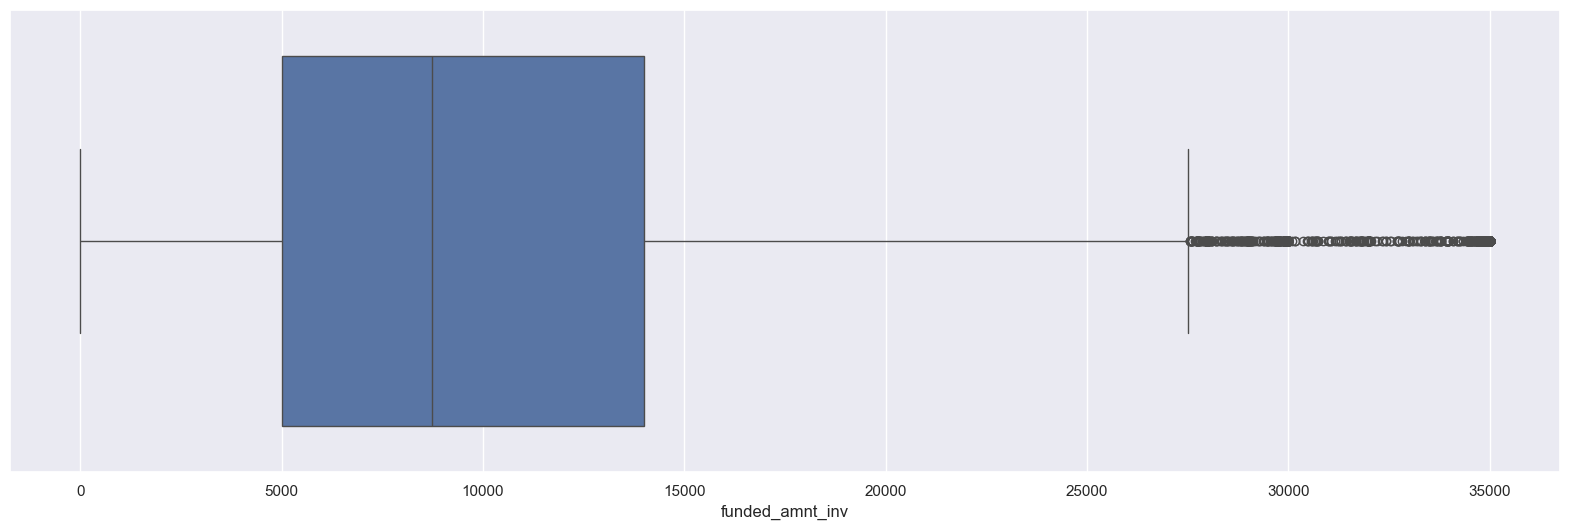

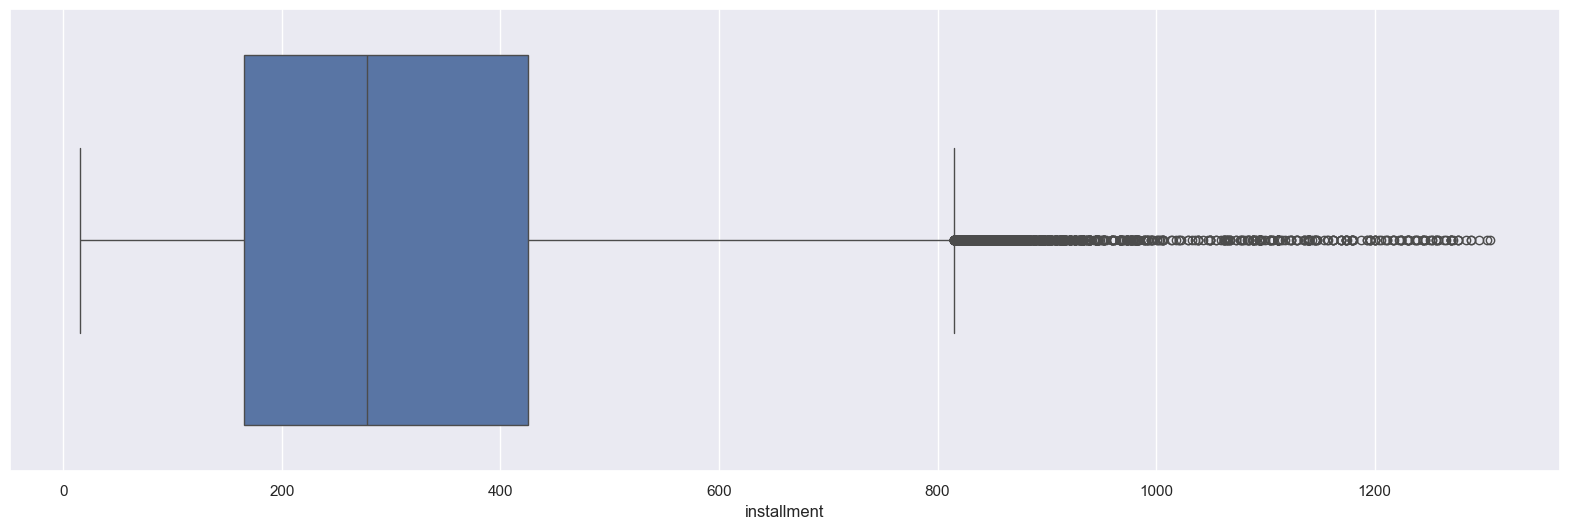

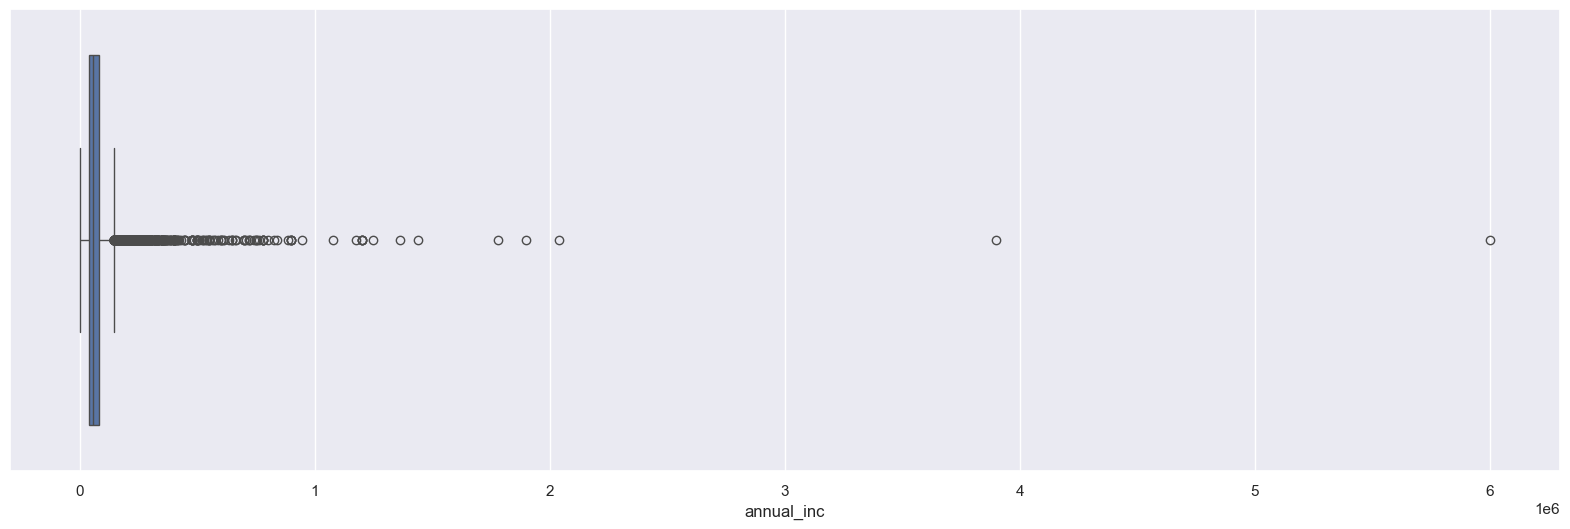

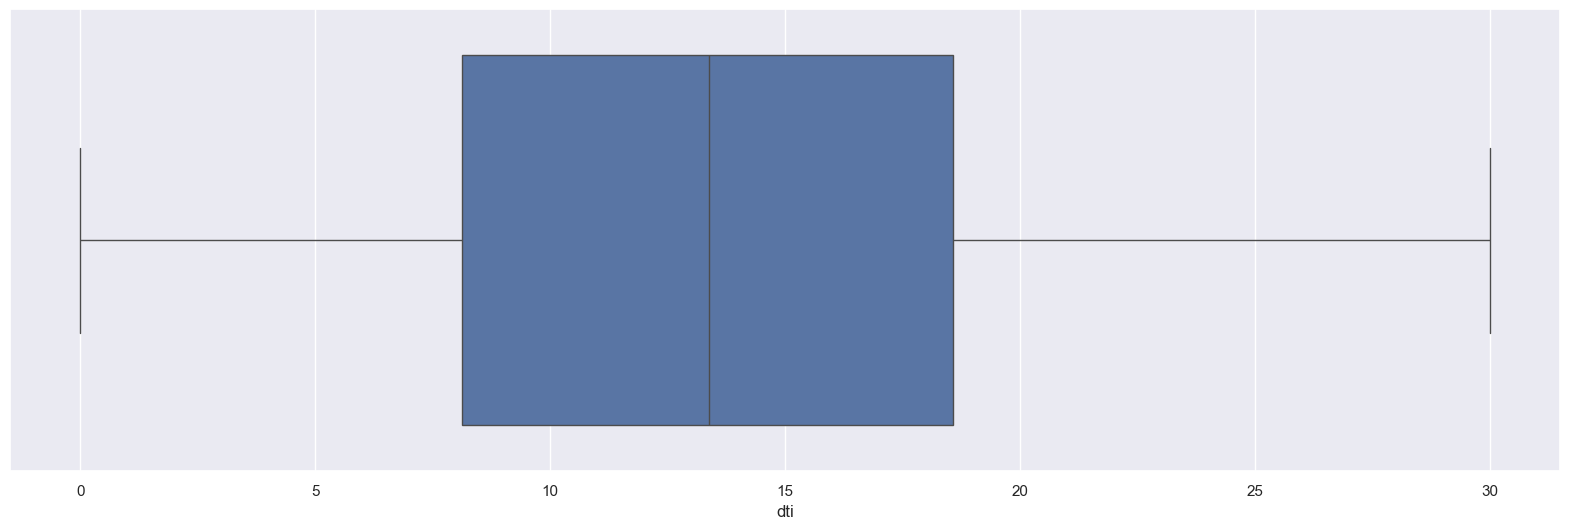

In [14]:
# checking outliers in numerical columns
num_col_n = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment','annual_inc', 'dti']
for i in  num_col_n:
    sns.set_theme(style = 'darkgrid')
    plt.figure(figsize=(20,6))
    sns.boxplot(x= df[i])
    plt.plot


- No such evidences of outl;ier in the data

### Adding buckets to specific columns and derving month and year from issue_d column


In [15]:
# Extracting Month and Year for analysis from issue_d
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year

In [16]:
# Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket), funded amount bucket (funded_amnt_bucket), Debt to Income Bucket (dti_bucket)
def bucket_data(column, thresholds, labels) -> str:
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df['loan_amnt_bucket'] = df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [17]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df['loan_amnt_bucket'] = df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [18]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df['int_rate_bucket'] = df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [19]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
df['annual_inc_bucket'] = df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [20]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['dti_bucket'] = df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

## EDA 

#### Analysing few of the categorical columns : grade, purpose, home_ownership (overall analysis)

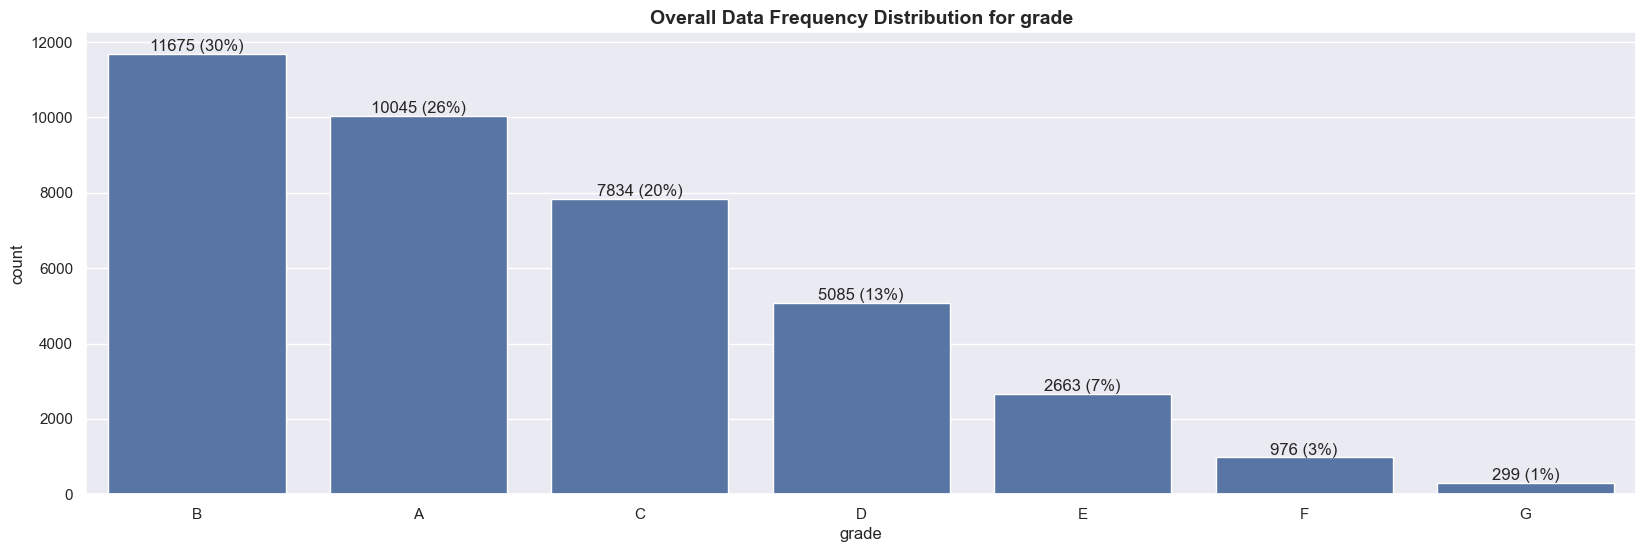

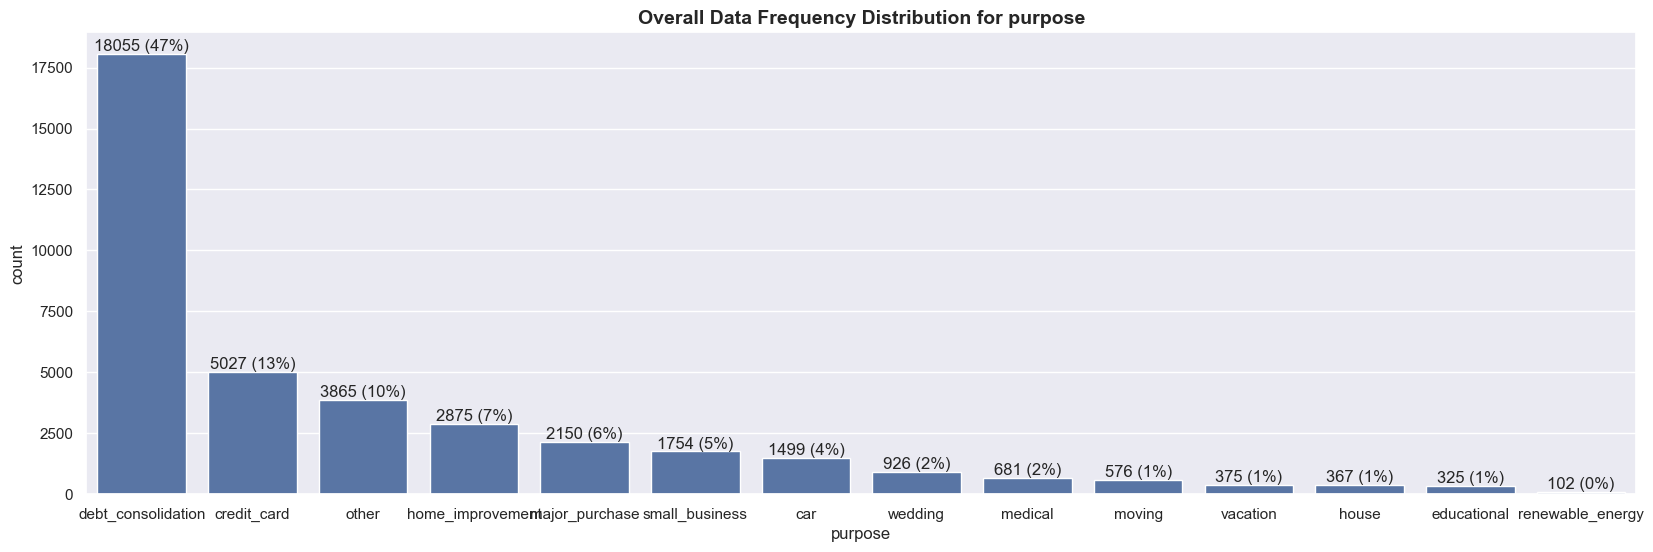

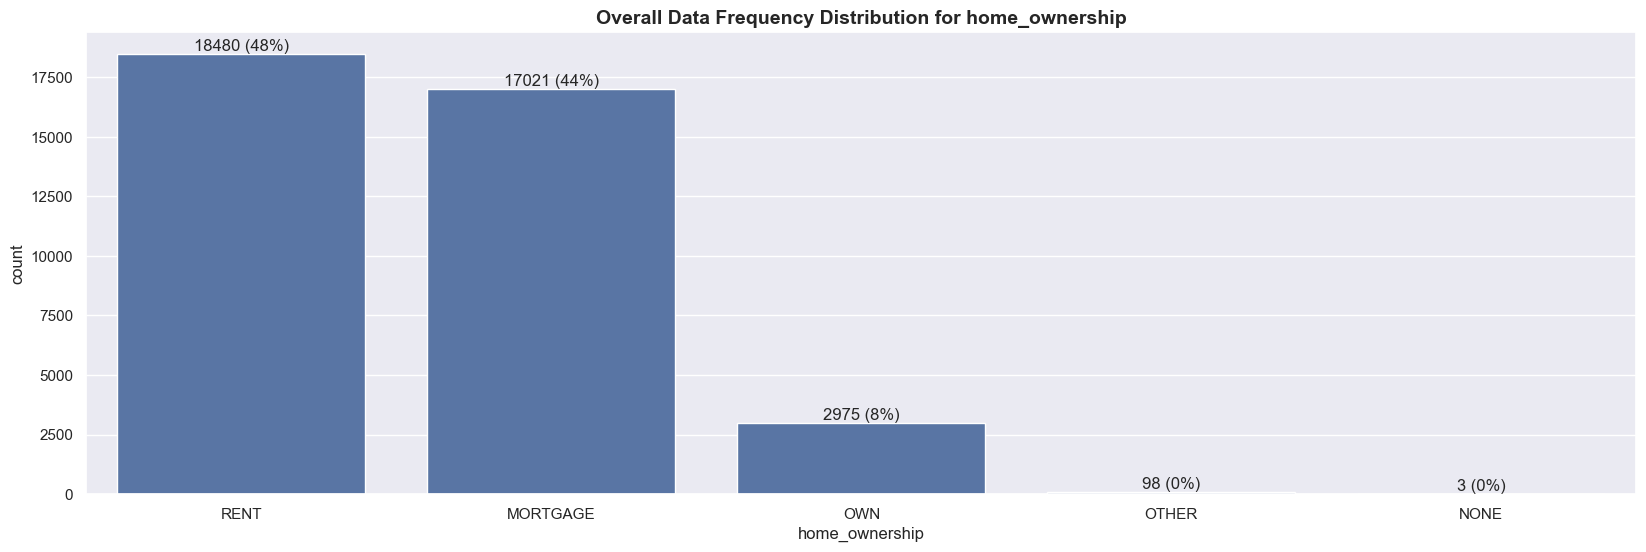

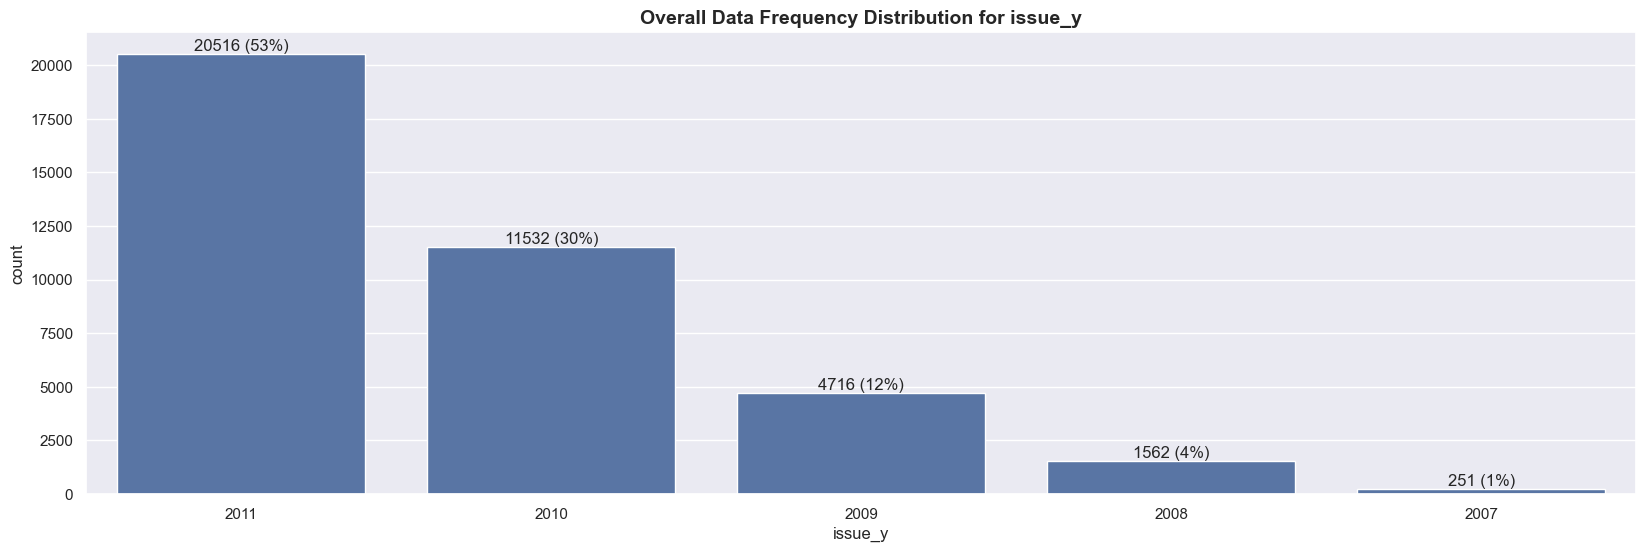

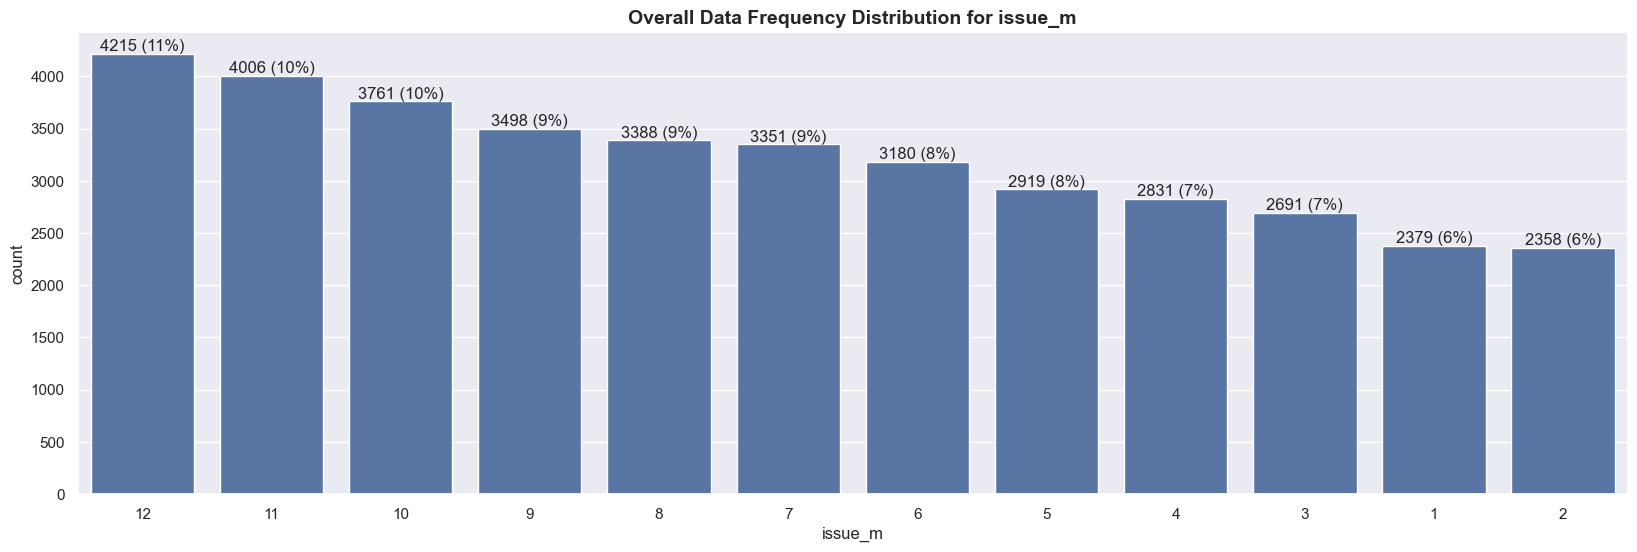

In [21]:
count_plot_cols = ["grade", "purpose", "home_ownership","issue_y", "issue_m"]
for i in count_plot_cols:
    plt.figure(figsize=(20, 6))
    ax = sns.countplot(x=df[i],
                    order=df[i].value_counts(ascending=False).index);
            
    abs_values = df[i].value_counts(ascending=False)
    rel_values = df[i].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.title(f"Overall Data Frequency Distribution for {i}", fontsize=14, fontweight='bold')
    plt.show()

# Segmented Bivariate Analysis

- Analysis between Fully paid and charged off customers for categorigal columns


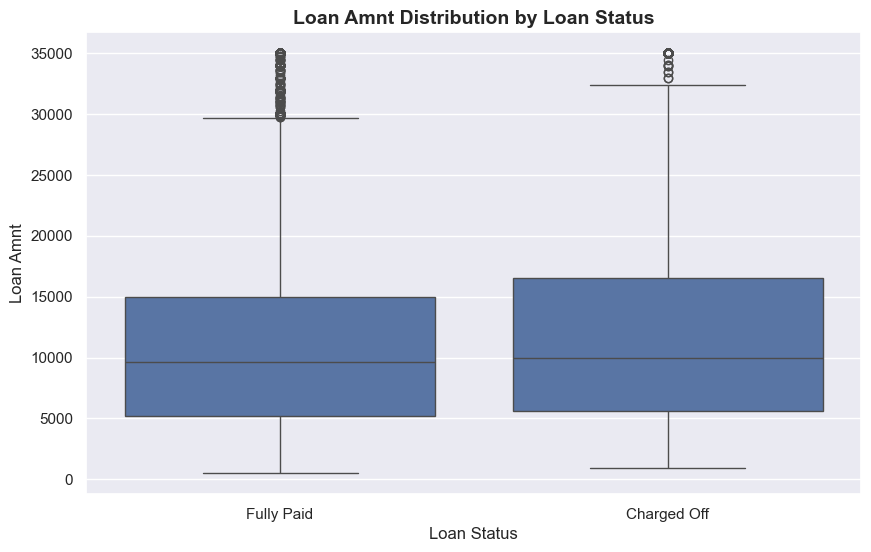

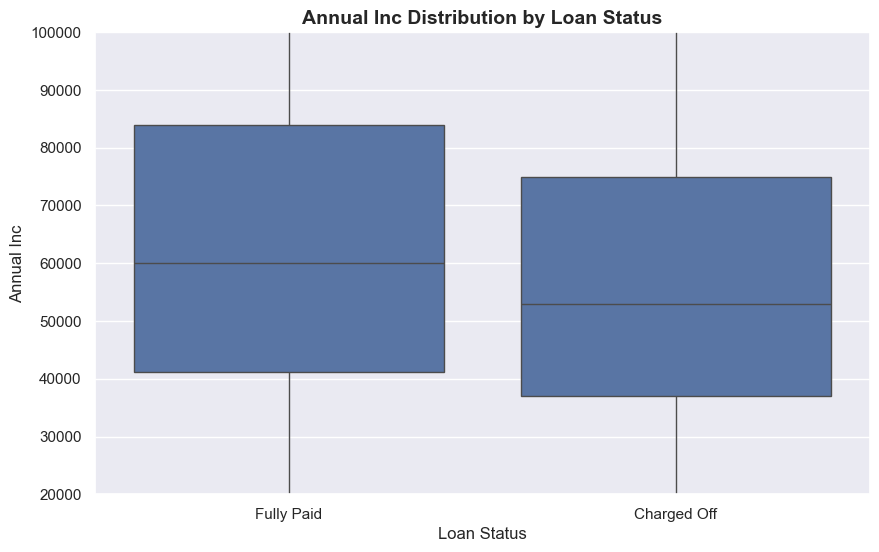

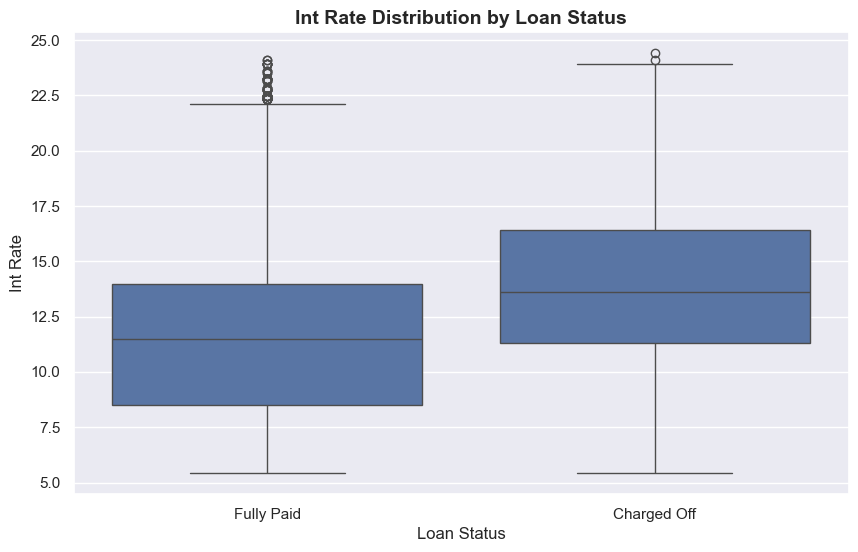

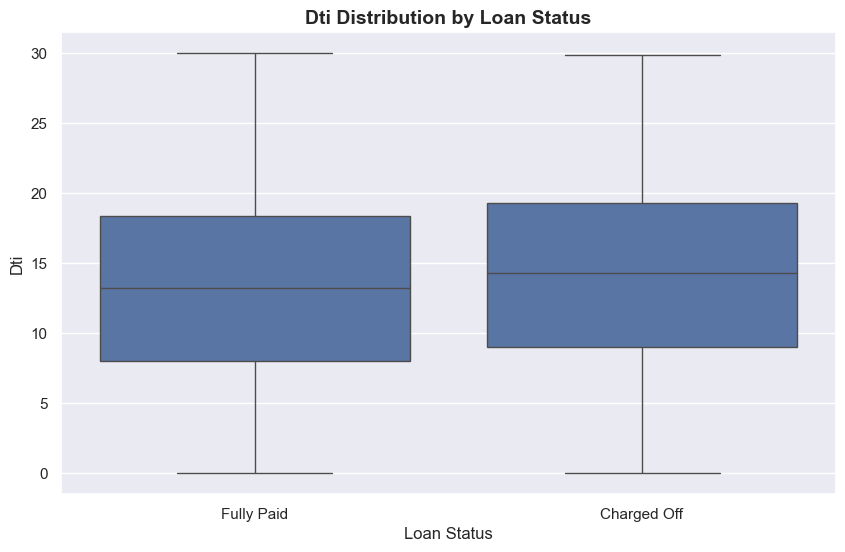

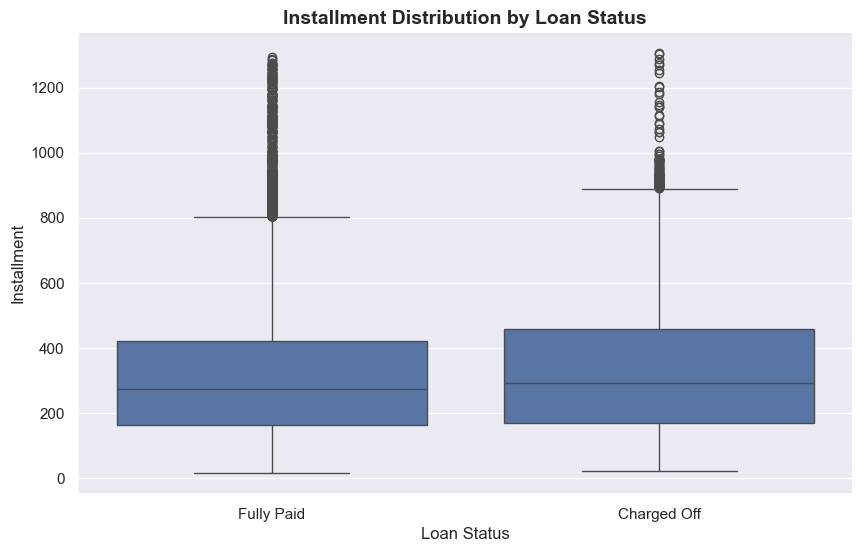

In [22]:
# Segmented Univariate Analysis: Loan Amount by Loan Status
box_col = ["loan_amnt", "annual_inc", "int_rate", "dti", "installment"]
color_palette = "Set2"  # Choose a color palette from seaborn or matplotlib


def convert_col_name(col_name):
    return col_name.replace('_', ' ').title()

sns.set_theme(style="darkgrid")

box_col = ["loan_amnt", "annual_inc", "int_rate", "dti", "installment"]



for i in box_col:
    plt.figure(figsize=(10, 6))
    
    # Convert the column name for title and ylabel
    readable_name = convert_col_name(i)
    
    # Boxplot for 'annual_inc' with custom y-limit and color palette
    if i == "annual_inc":
        sns.boxplot(x='loan_status', y=i, data=df )
        plt.title(f"{readable_name} Distribution by Loan Status", fontsize=14, fontweight='bold')
        plt.xlabel('Loan Status', fontsize=12)
        plt.ylim([20000, 100000])
        plt.ylabel(readable_name, fontsize=12)
        plt.show()
    
    else:
        sns.boxplot(x='loan_status', y=i, data=df)
        plt.title(f"{readable_name} Distribution by Loan Status", fontsize=14, fontweight='bold')
        plt.xlabel('Loan Status', fontsize=12)
        plt.ylabel(readable_name, fontsize=12)
        plt.show()

- Bi variate analsysis of for bucketed columns

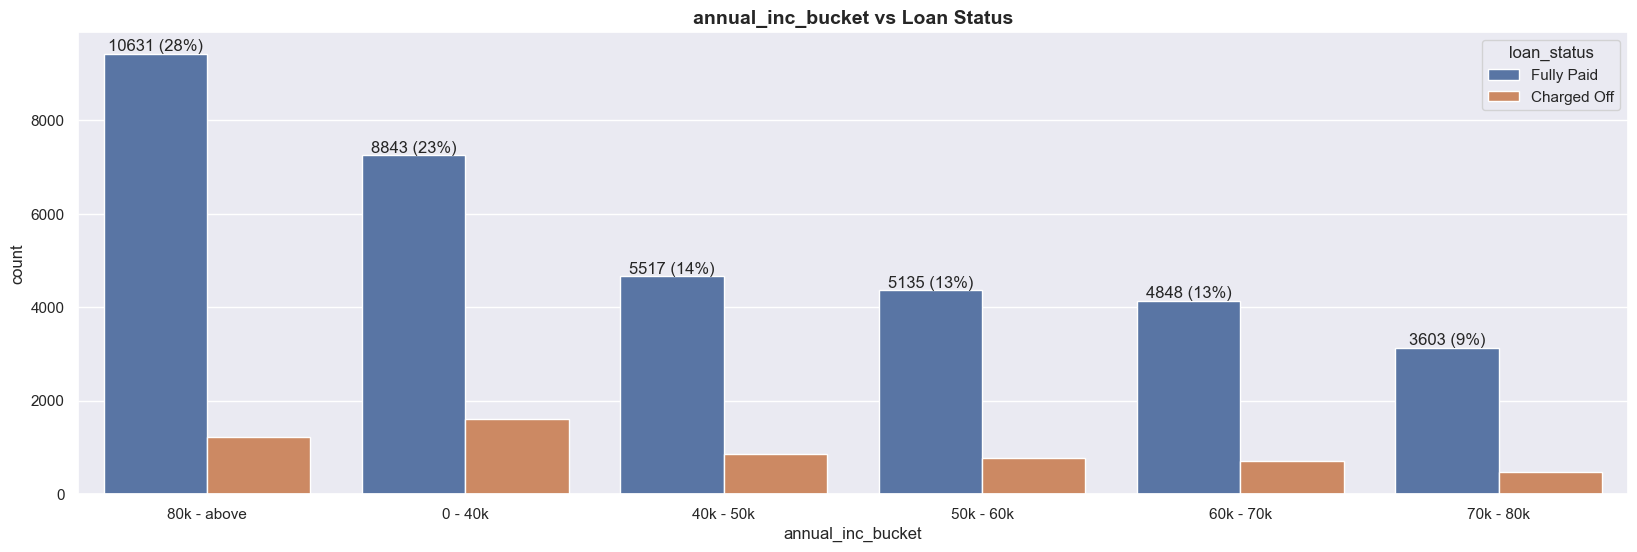

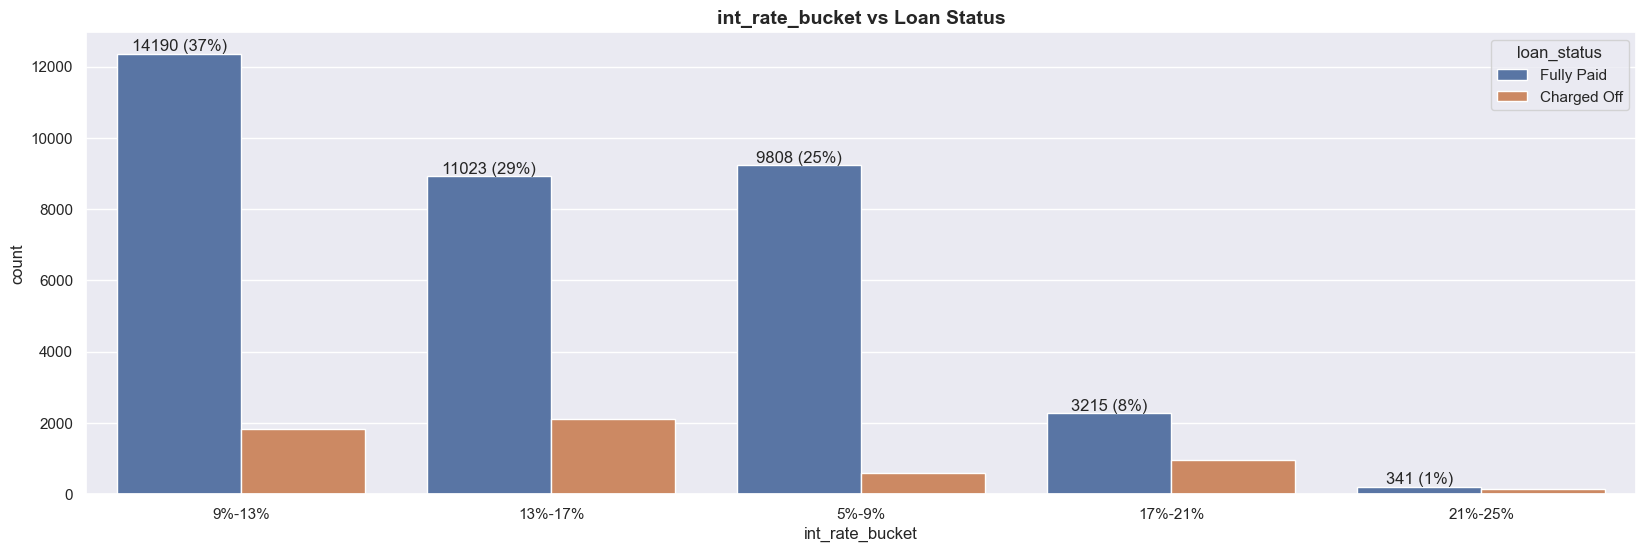

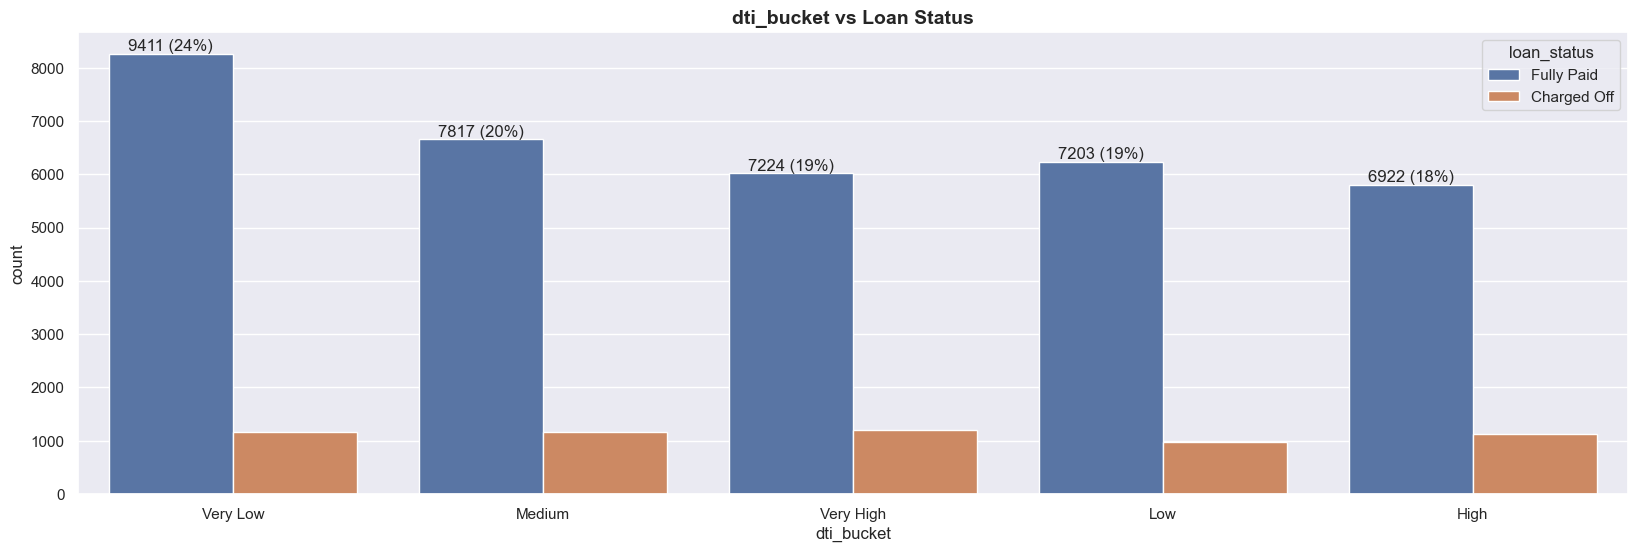

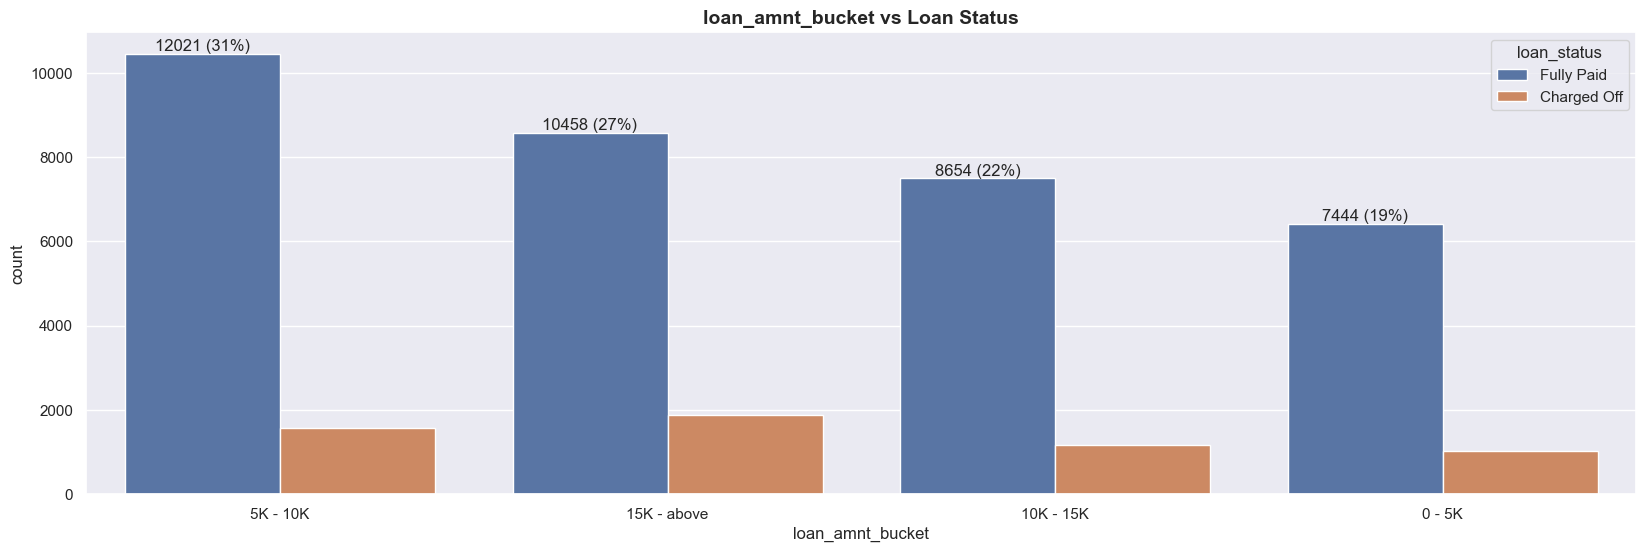

In [23]:
for col in ['annual_inc_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    plt.figure(figsize=(20, 6))
    ax = sns.countplot(x=df[col],
                    order=df[col].value_counts(ascending=False).index, hue= df['loan_status']);
            
    abs_values = df[col].value_counts(ascending=False)
    rel_values = df[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.title(f"{col} vs Loan Status", fontsize=14, fontweight='bold')
    plt.show()

#### Creating a new dataframe df_3 to specifically analyse charged_off customers


In [24]:
df_3 = df[df['loan_status']== 'Charged Off']

## segreagting columns into numercial and categorical and excluding the ones that are of no use

In [25]:
extra_cols=["id", "member_id", "sub_grade", "emp_titile", "title","zip_code", "out_prncp", "out_prncp_inv", "loan_status", "pymnt_plan", "dti_bucket" ]
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df_3[i].nunique()>51 and i not in extra_cols:
        num_cols.append(i)
    elif df_3[i].nunique()<=51 and i not in extra_cols:
        cat_cols.append(i)  

## Univariate Analysis for charged off customers
- Frequency Distribution of Categorical Columns

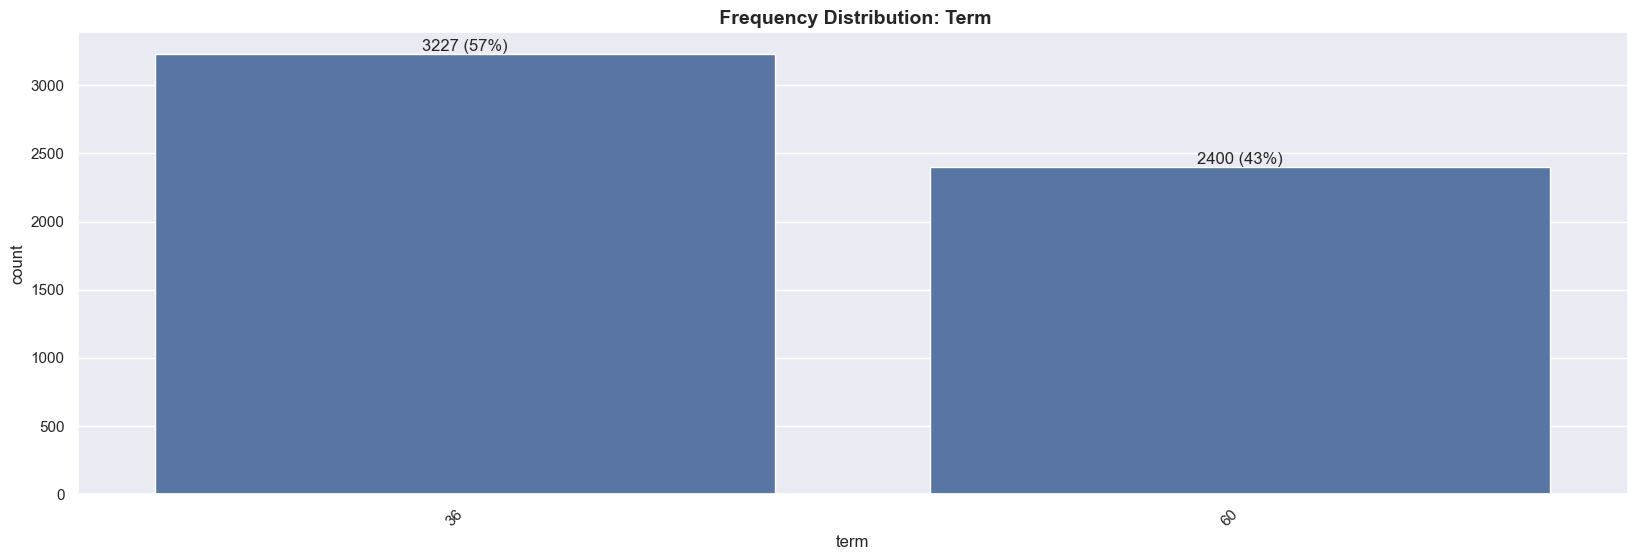

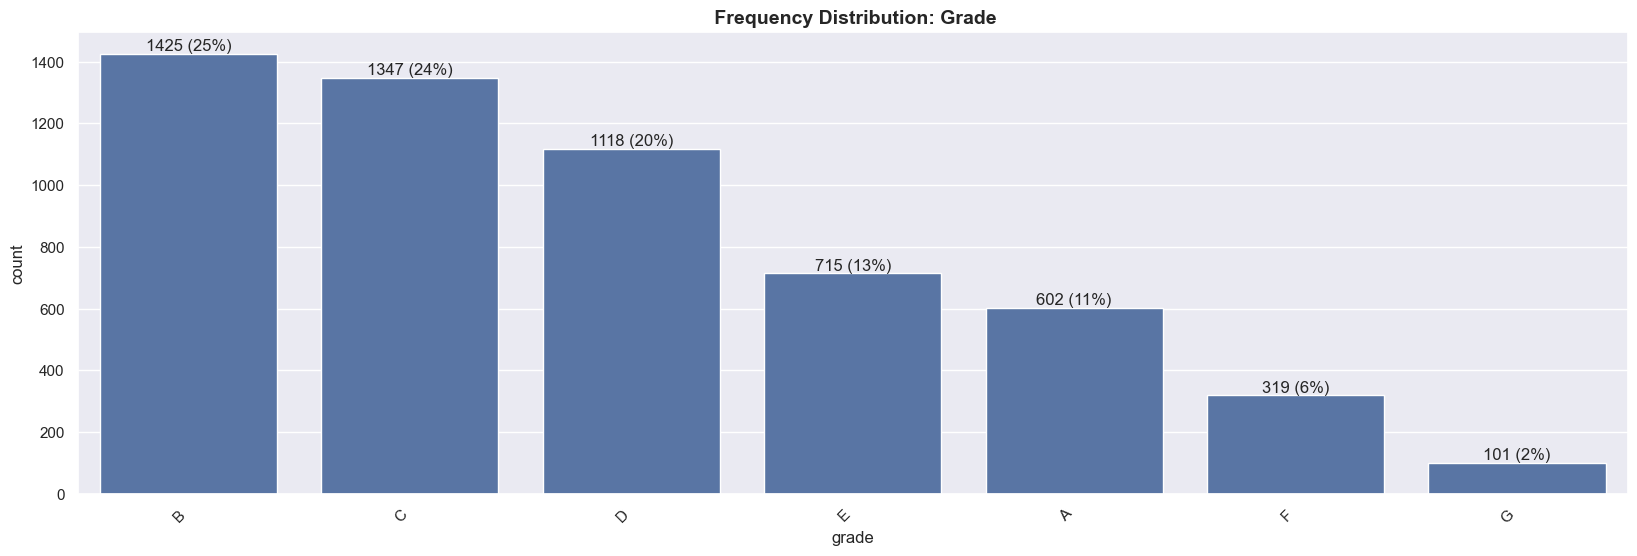

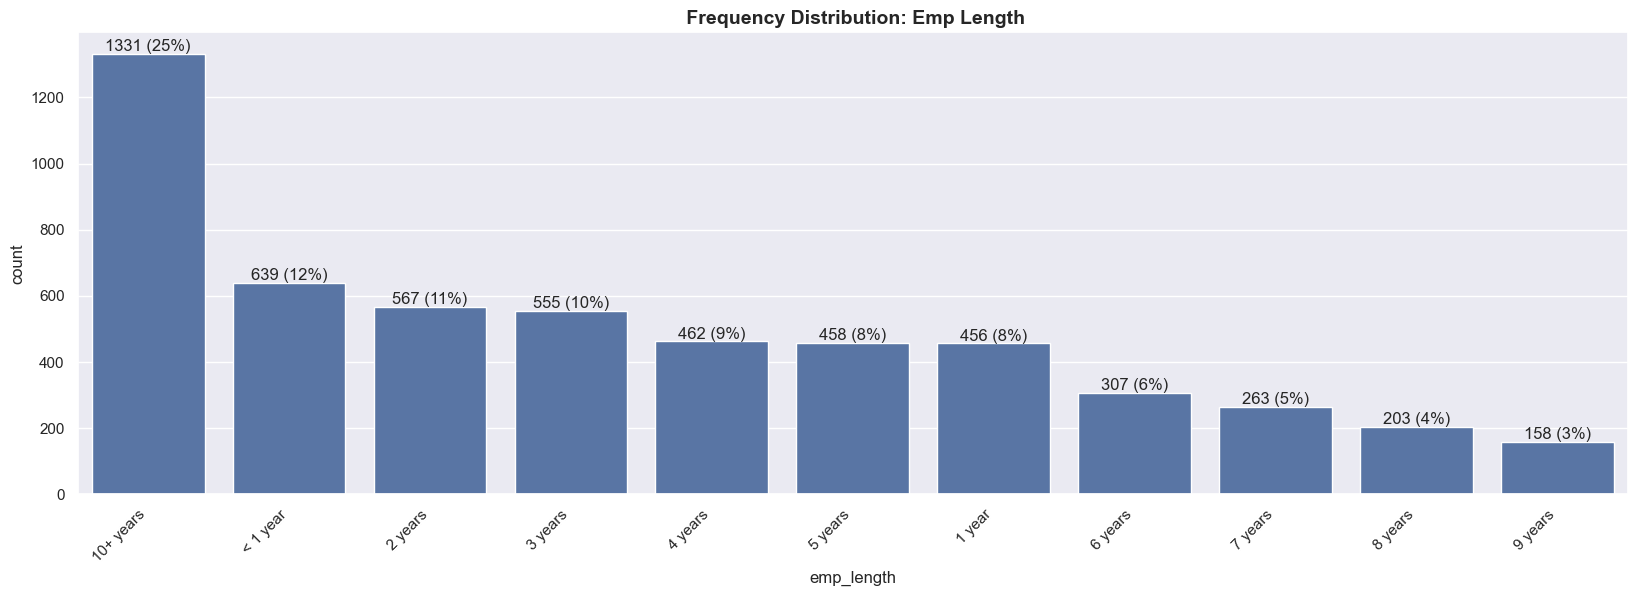

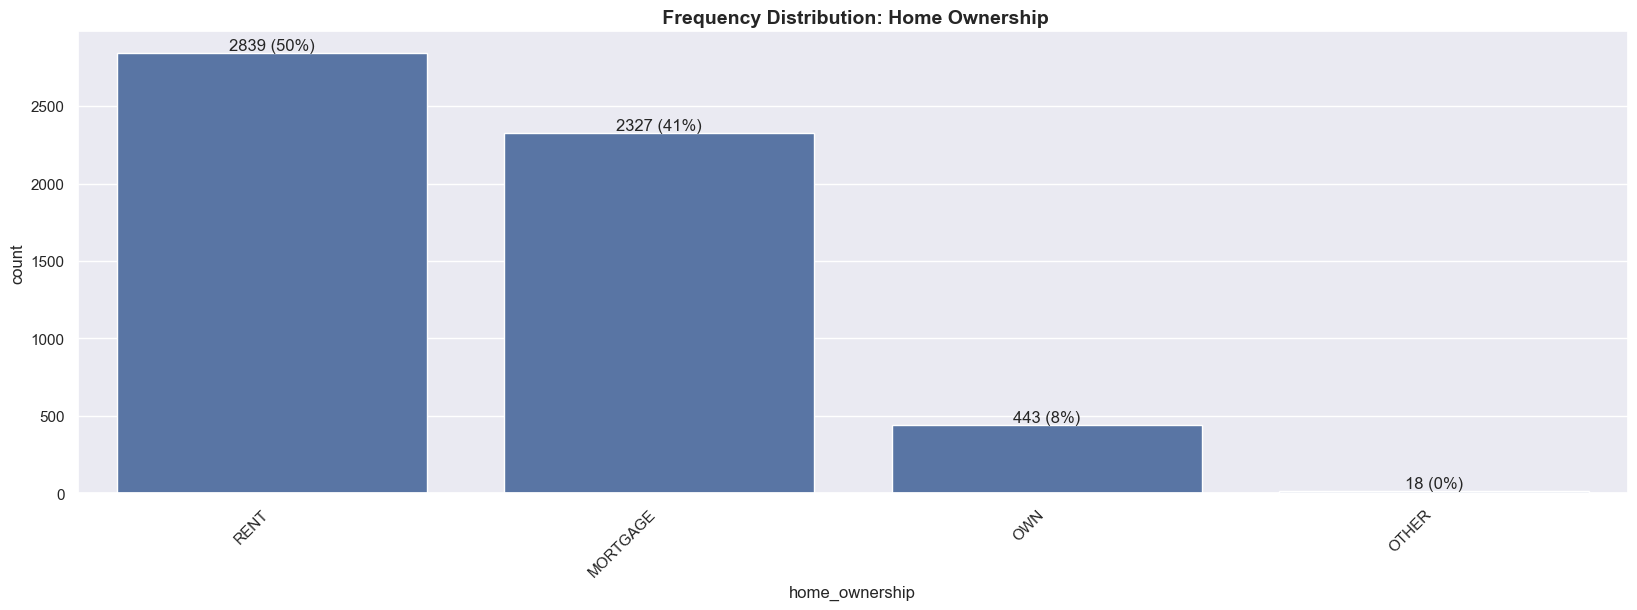

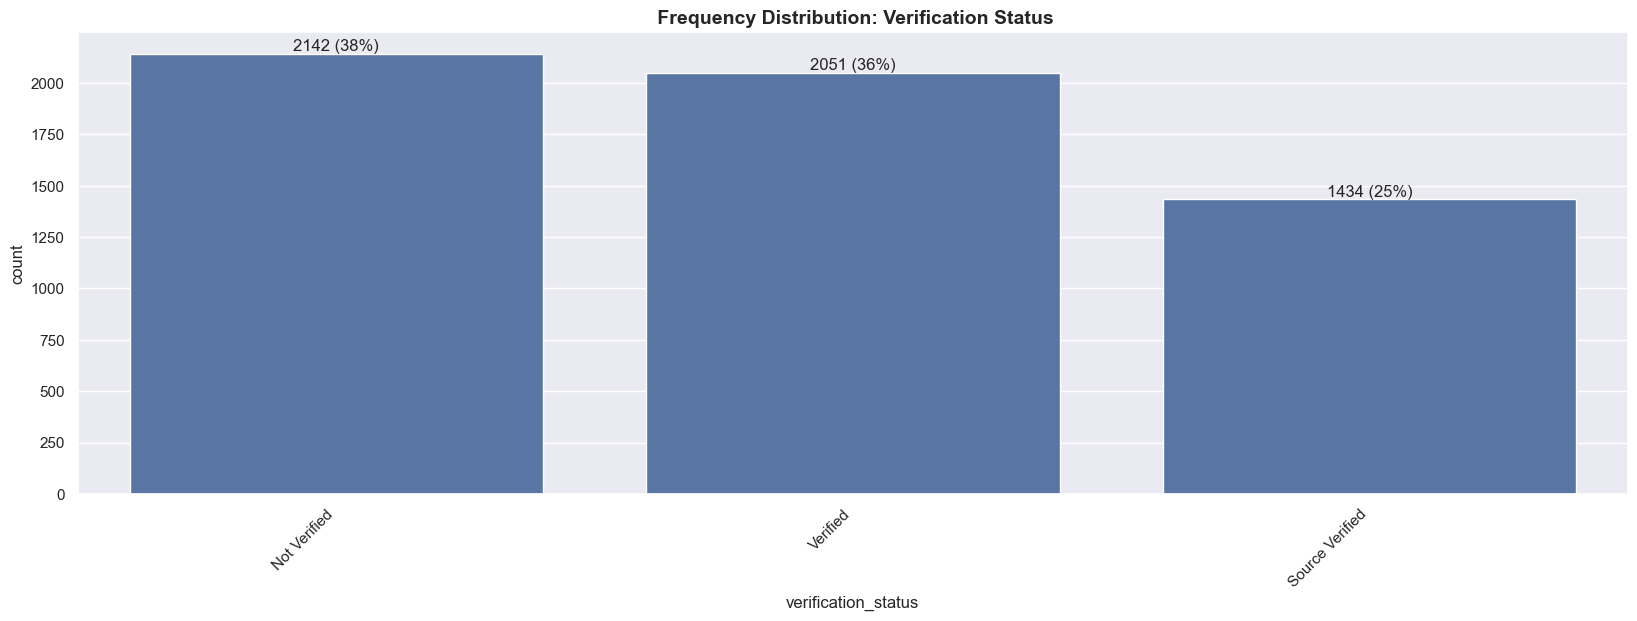

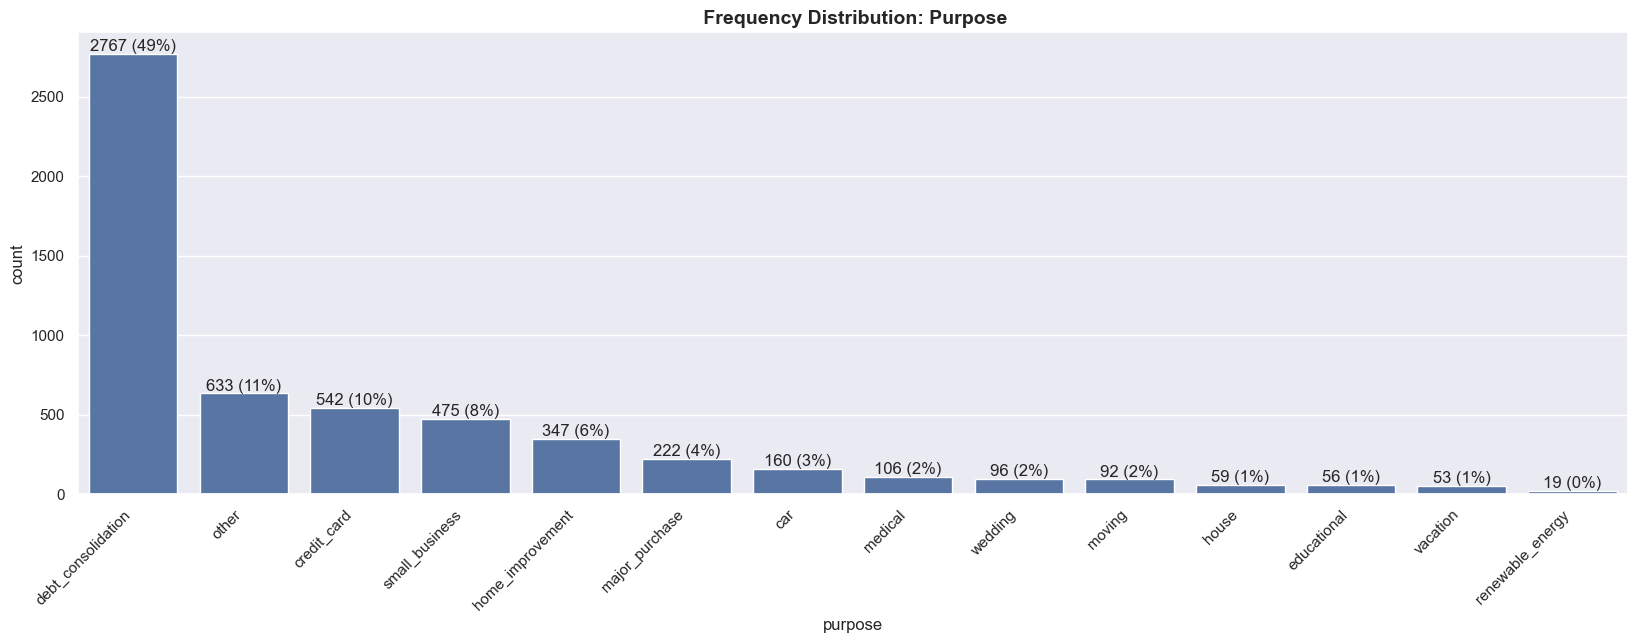

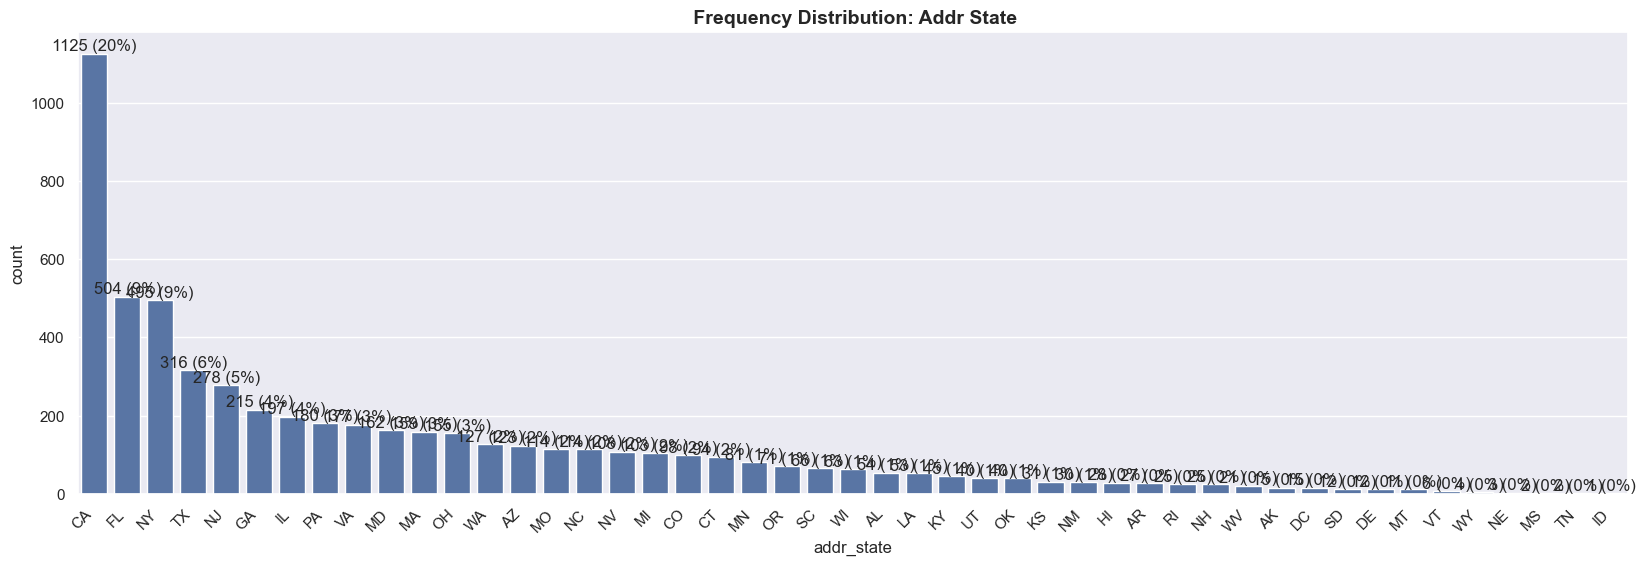

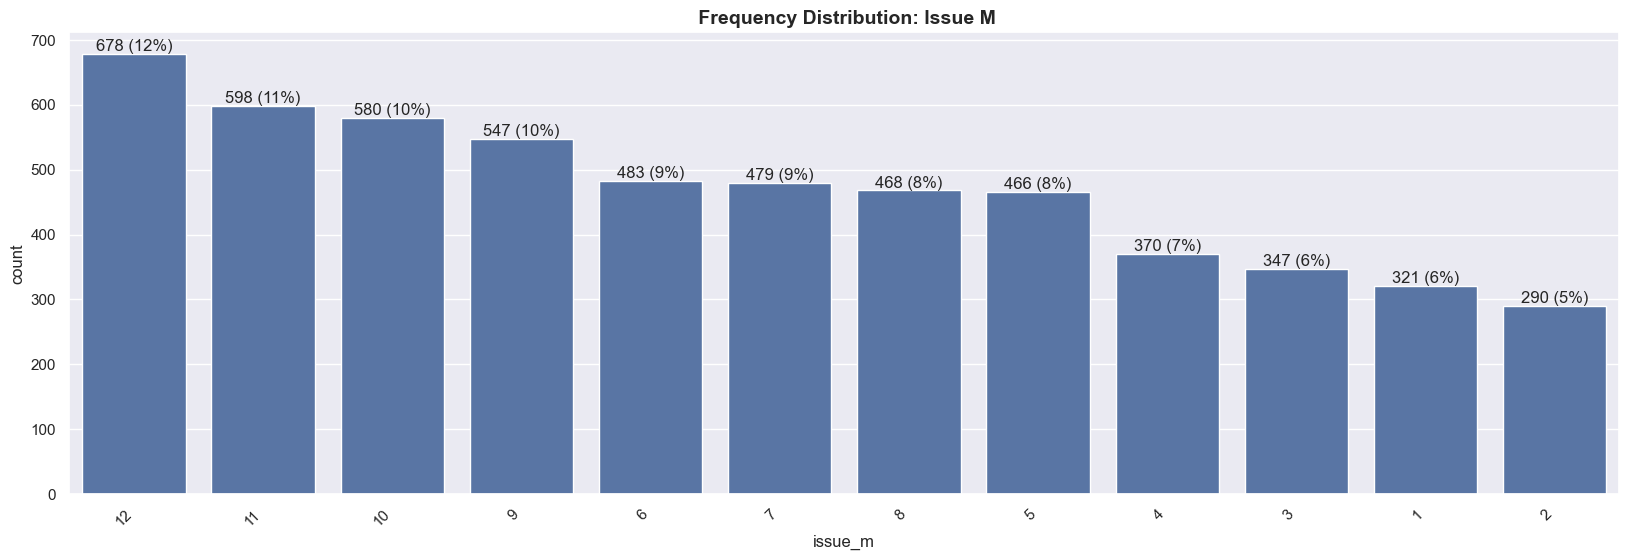

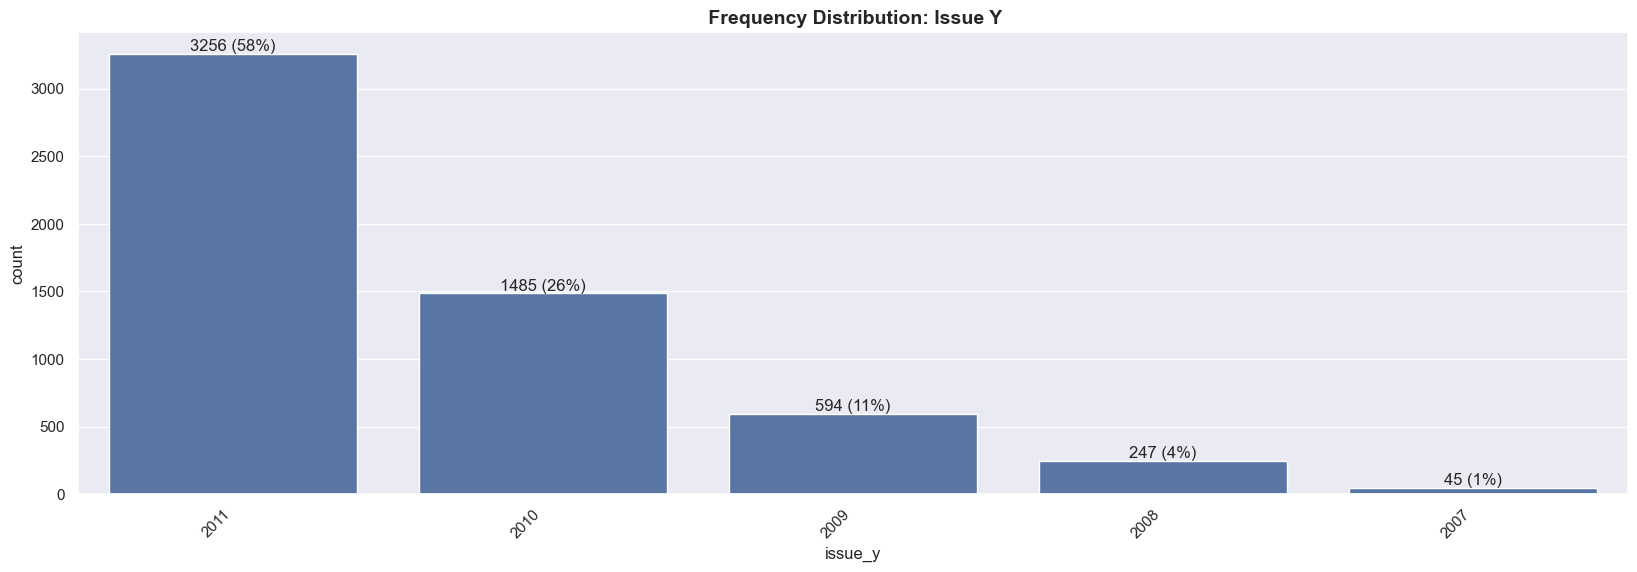

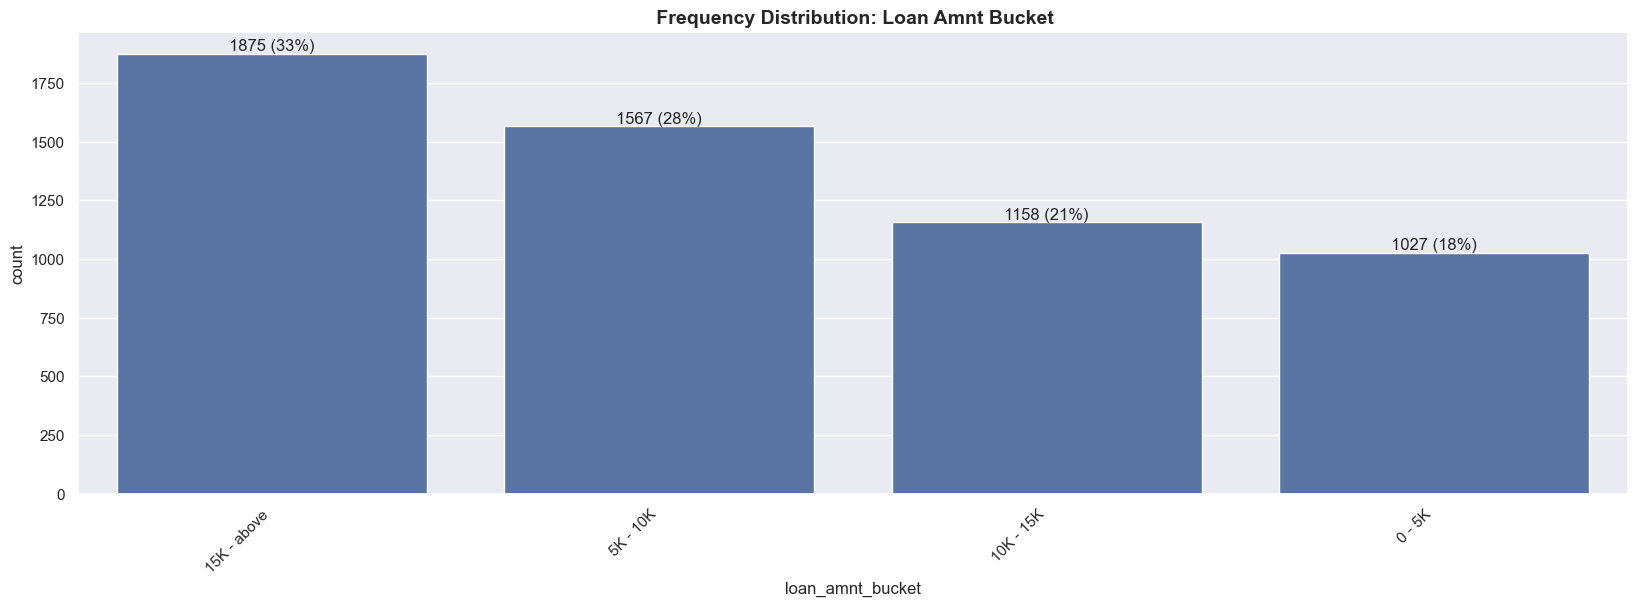

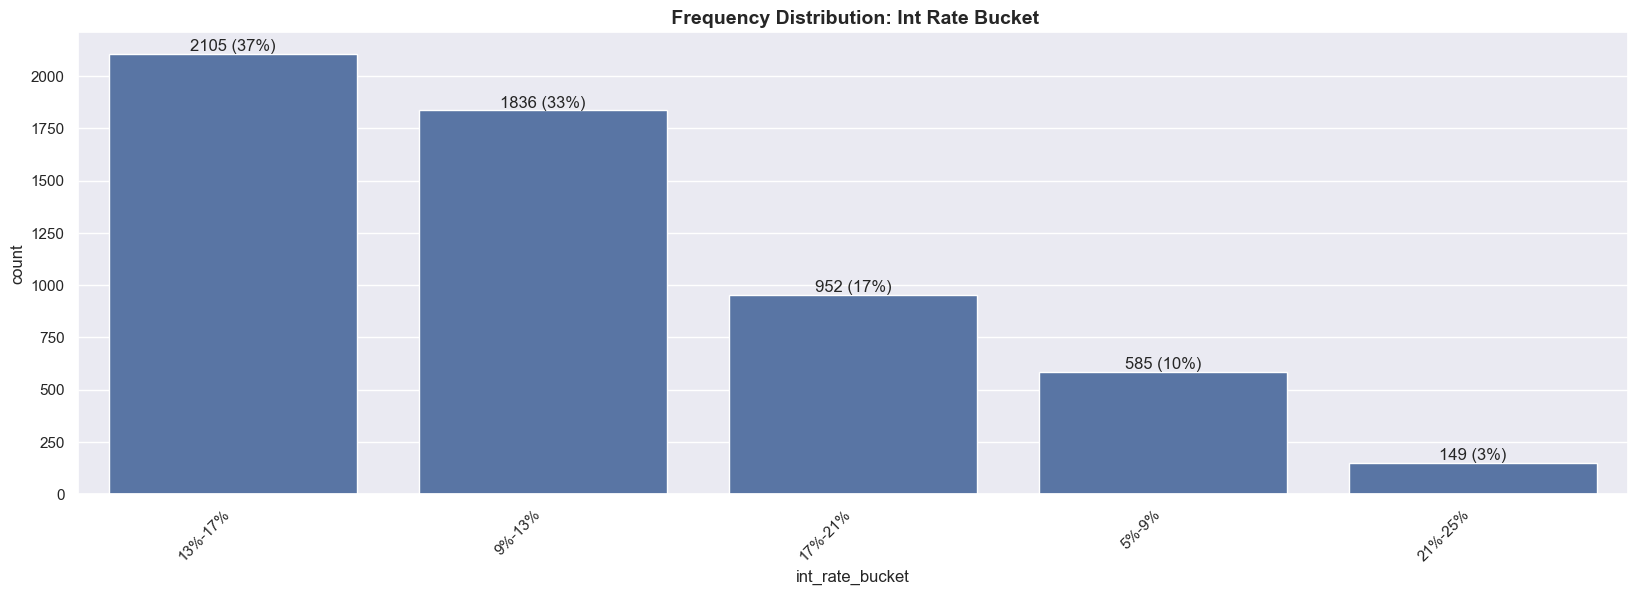

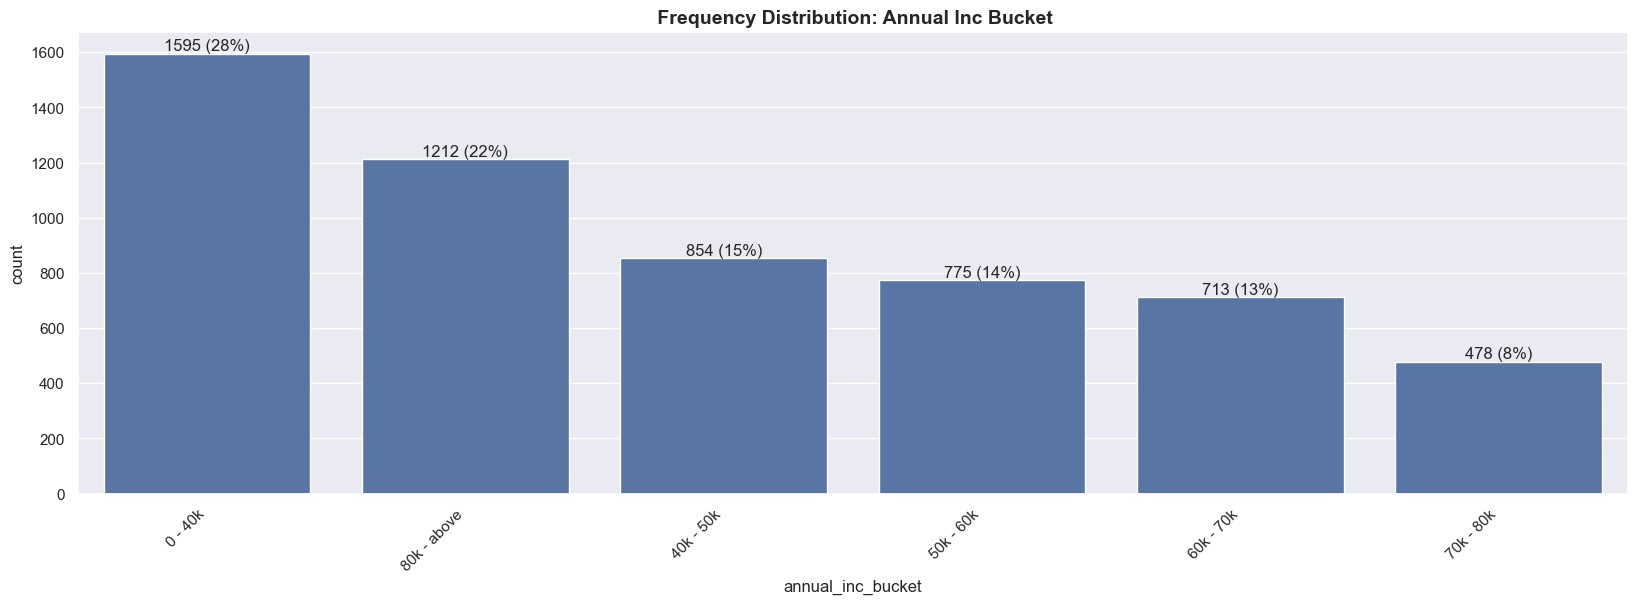

In [26]:
sns.set_theme(style="darkgrid")
for col in cat_cols:
    readable_name_n = convert_col_name(col)
    plt.figure(figsize=(20, 6))
    ax = sns.countplot(x=df_3[col],
                       order=df_3[col].value_counts(ascending=False).index);
            
    abs_values = df_3[col].value_counts(ascending=False)
    rel_values = df_3[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    
    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.xticks(rotation=45, ha='right')
    plt.title(f" Frequency Distribution: {readable_name_n}", fontsize=14, fontweight='bold')
    plt.show()

In [34]:
# Ensure you're working on a copy
df_3 = df_3.copy()

# Modify the column safely
df_3.loc[:, 'earliest_cr_line_year'] = df_3['earliest_cr_line'].dt.year


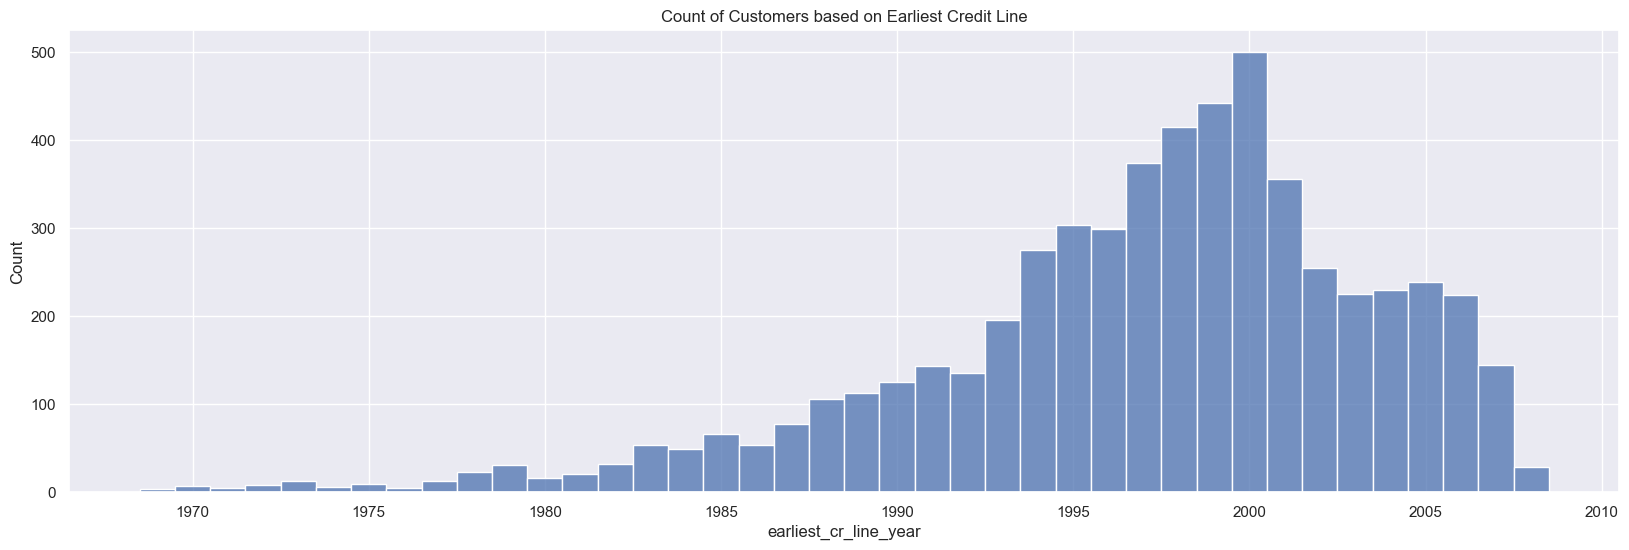

In [35]:
df_3_n = df_3[df_3['earliest_cr_line_year'] < 2012]
plt.figure(figsize= (20,6))
sns.histplot(x = df_3_n['earliest_cr_line_year'], discrete=True)
plt.title('Count of Customers based on Earliest Credit Line')
plt.show()

## Bivariate Analysis

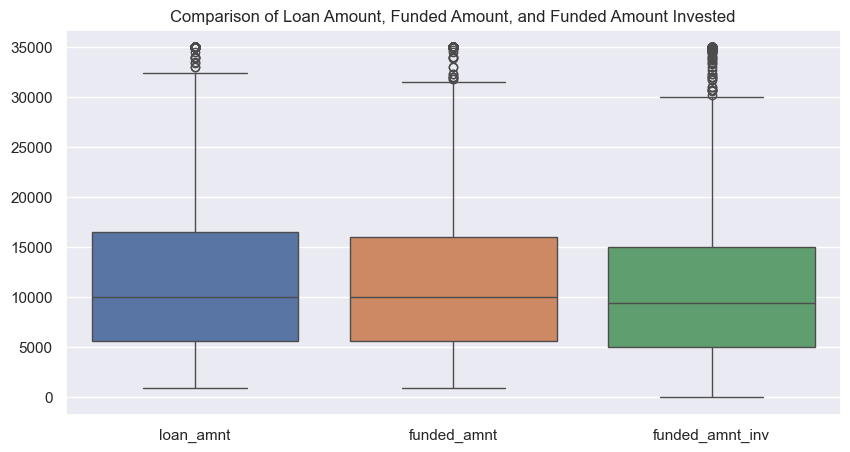

In [29]:
# Relationship between loan_amnt, funded_amnt, and funded_amnt_inv
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_3[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']])
plt.title('Comparison of Loan Amount, Funded Amount, and Funded Amount Invested')
plt.show()


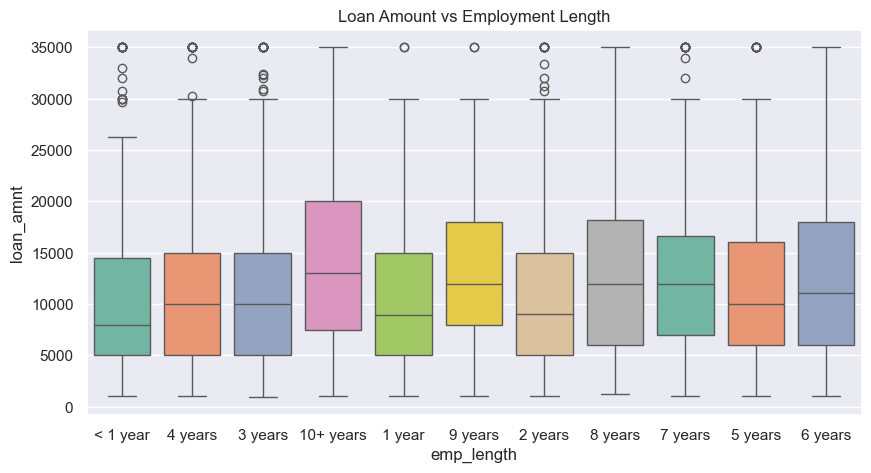

In [30]:
# Loan amount and funded amount vs employment length
plt.figure(figsize=(10, 5))
sns.boxplot(x='emp_length', y='loan_amnt', data=df_3, palette='Set2', hue= 'emp_length', legend= False)
plt.title('Loan Amount vs Employment Length')
plt.show()


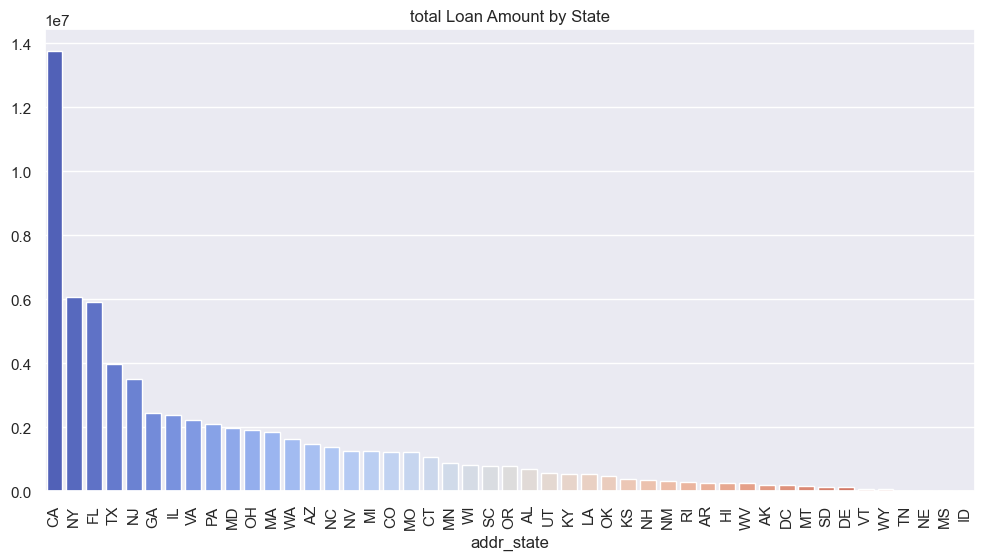

In [31]:
# State with the highest loan amount
state_loan_amnt = df_3.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_loan_amnt.index, y=state_loan_amnt.values, palette='coolwarm', hue= state_loan_amnt.index, legend= False)
plt.xticks(rotation=90)
plt.title('total Loan Amount by State')
plt.show()

In [32]:
df_3['int_rate'].nunique()

332

## Checking correlation between the relevant numerical columns

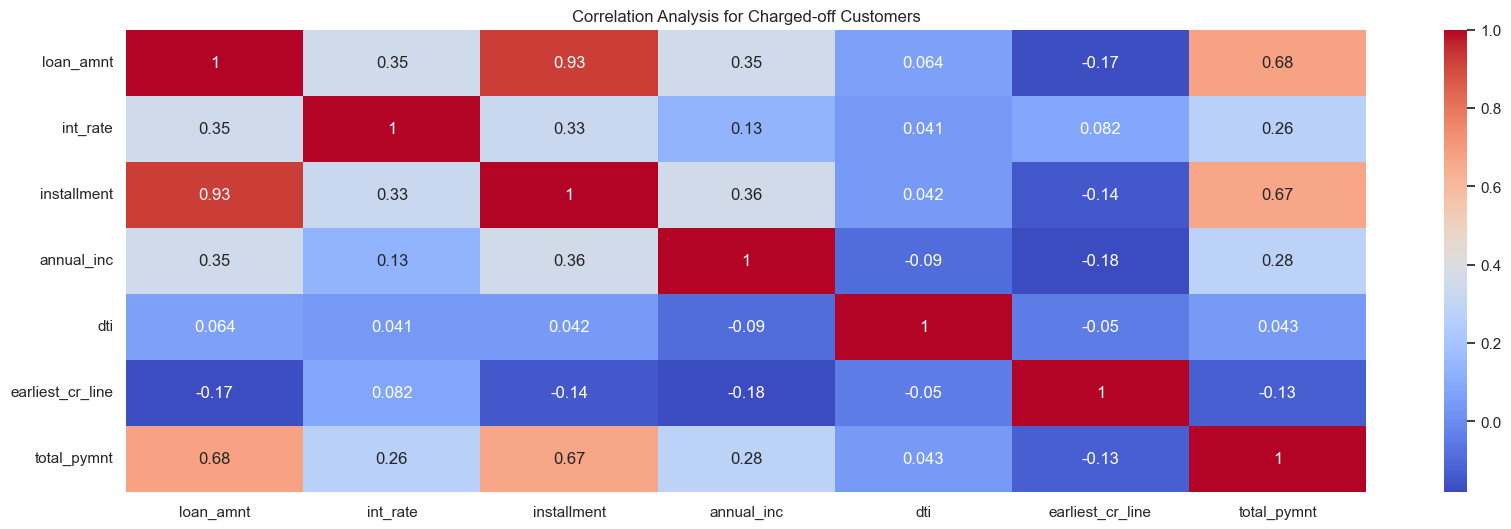

In [33]:
corr_columns = ['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'earliest_cr_line',
 'total_pymnt'
]
corr_matrix = df_3[corr_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis for Charged-off Customers')
plt.show()